# Data Visualisations of our Double Tap Trend Analysis Dataset

In this notebook we'll take a look at the dataset we engineered and see if we can construct some illuminating visualisations. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
!ls

Double_Tap_Feature_Engineering.ipynb gj_30base.csv
Forex_Data_Analysis.ipynb            gj_4base.csv
Forex_Models.ipynb                   gj_4hour_trend.csv
README.md                            gj_4hr.csv
dt_trend_clean.csv                   gj_cleandraft.csv
dt_trend_clean_mk2                   gj_thirty_trend.csv
features.txt                         gpbjpy_dataframe_gen.ipynb
forex.html                           superseded
gj30m_sentinc.csv                    trend_data_analysis.ipynb
gj4h_sentinc.csv                     trend_feature_eng.ipynb
gj_30_RSI_exp.csv


## MK1 DATASET

In [5]:
forex = pd.read_csv("dt_trend_clean.csv")

In [6]:
forex.head()

,time,open,high,low,close,fast_stoch,slow_stoch,rsi,30_sent,thirty_trend,4h_sent,four_trend,candle_dir,dt_signal,sent_signal,simple_result,running_result,profit
0,2019-01-07 14:00:00,138.322,138.408,138.268,138.272,91.285107,86.681139,60.939545,-0.018425,bullish,0.134107,bullish,short,short,short_trade,win,loss,0.070
1,2019-01-07 15:30:00,138.578,138.687,138.346,138.492,89.649879,90.104441,64.826891,0.002249,bullish,0.134107,bullish,short,short,short_trade,win,win,0.170
2,2019-01-07 18:30:00,138.802,138.824,138.532,138.622,86.898499,91.325175,61.871256,0.022497,bullish,0.167150,bullish,short,short,short_trade,running_short,sig_stop,-0.059
3,2019-01-07 20:30:00,138.829,138.874,138.762,138.816,88.437094,81.676800,66.758711,0.021740,bullish,0.167150,bullish,short,short,short_trade,running_short,loss,-0.078
4,2019-01-07 23:00:00,138.926,138.966,138.878,138.887,90.241474,91.861208,67.107538,0.019568,bullish,0.183445,bullish,short,short,short_trade,sig_stop,no_runner,-0.001


In [7]:
forex.describe()

,open,high,low,close,fast_stoch,slow_stoch,rsi,30_sent,4h_sent,profit
count,2573.000000,2573.00000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000
mean,137.991636,138.07966,137.903967,137.996325,50.626381,50.790341,49.890652,0.000677,0.004370,0.011112
std,5.280938,5.26563,5.288262,5.274838,27.324116,27.368937,12.474311,0.050251,0.128737,0.115448
min,124.966000,125.25600,124.599000,125.154000,2.633239,2.692453,16.232067,-0.246377,-0.411713,-0.821000
25%,133.904000,134.01000,133.780000,133.910000,25.386149,25.242554,41.255514,-0.029329,-0.072051,-0.064000
50%,137.986000,138.14100,137.914000,138.056000,50.537634,50.504372,49.262785,-0.000424,0.004830,-0.012000
75%,142.570000,142.66200,142.530000,142.616000,77.030283,76.488079,58.516163,0.026149,0.076772,0.070000
max,148.374000,148.40300,148.164000,148.264000,98.069474,97.062156,85.165378,0.353666,0.510845,0.170000


In [8]:
forex.simple_result.value_counts()

win              793
sig_stop         693
loss             530
running_long     290
running_short    267
Name: simple_result, dtype: int64

In [9]:
forex.running_result.value_counts()

no_runner    1223
win           835
sig_stop      250
loss          239
runner         26
Name: running_result, dtype: int64

## Stochastic Impact on Trade Results

We'd like to look at what impact the stochastic value, at the time of the trade, has on the final trade outcome. For this we'll split the table up as follows:


sent_signal== short_trade
1. simple wins vs losses plotted with slow_stoch on x_axis and profit on y_axis, wins and losses color coded
2. simple wins vs losses for short trades plotted as plot 1 abaove
3. simple wins vs losses for long trades plotted as plot 1 above


### 1. Wins and Losses for All Trades

In [10]:
#filter for wins and losses in our forex dataset
stoch = forex[(forex.simple_result=="win") | (forex.simple_result=="loss")]

In [11]:
stoch.simple_result.value_counts()

win     793
loss    530
Name: simple_result, dtype: int64

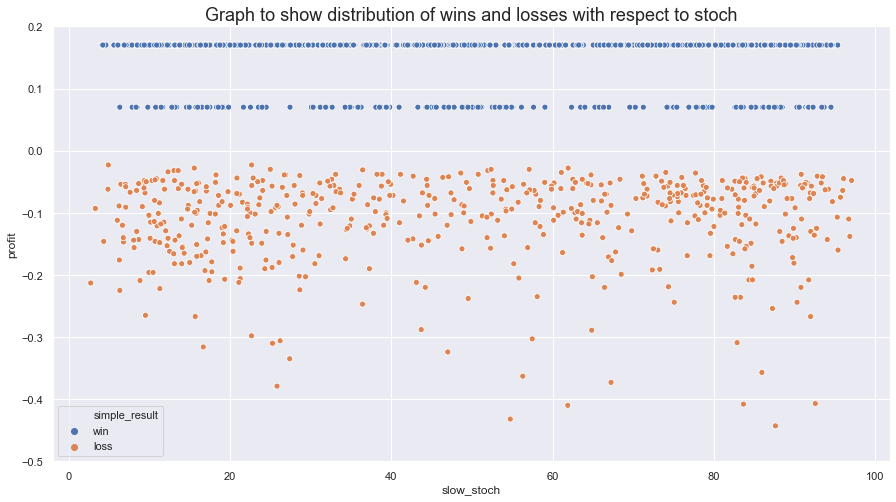

In [12]:
#Plot 1 - simple wins vs losses
plt.figure(figsize=(15,8))


sns.set(style="darkgrid")

sns.scatterplot(x="slow_stoch", y="profit", hue="simple_result", data=stoch)
plt.title("Graph to show distribution of wins and losses with respect to stoch", fontsize=18)

plt.ylim([-0.5, 0.2])

plt.show()


In [13]:
stoch.profit.sum()

59.22399999999412

So this plot looks pretty random with wins and losses distributed roughly equally across the stochastic range. Now let's look at the plot again but this time by trade type. 

### 2. Wins and Losses for Short Trades

In [14]:
#filter for wins and losses for short trades in our forex data set
stochA = forex[((forex.simple_result=="win") | (forex.simple_result=="loss")) & (forex.sent_signal=="short_trade")]

In [15]:
stochA.sent_signal.value_counts()

short_trade    648
Name: sent_signal, dtype: int64

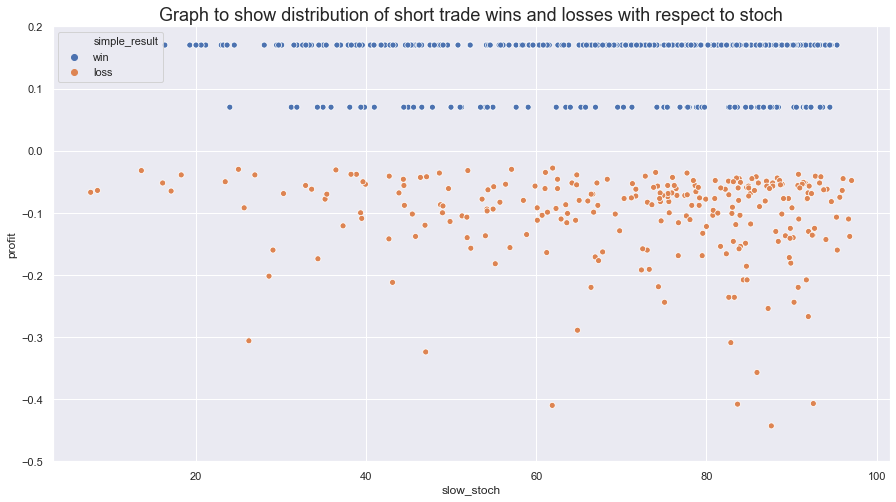

In [16]:
#Plot 2 - wins vs losses but for short trades only
plt.figure(figsize=(15,8))


sns.set(style="darkgrid")

sns.scatterplot(x="slow_stoch", y="profit", hue="simple_result", data=stochA)
plt.title("Graph to show distribution of short trade wins and losses with respect to stoch", fontsize=18)

plt.ylim([-0.5, 0.2])

plt.show()


In [17]:
stochA.simple_result.value_counts()

win     390
loss    258
Name: simple_result, dtype: int64

In [18]:
stochA.profit.sum()

31.303499999997157

### 3. Wins and Losses for Long Trades

In [19]:
stochB = forex[((forex.simple_result=="win") | (forex.simple_result=="loss")) & (forex.sent_signal=="long_trade")]

In [20]:
stochB.sent_signal.value_counts()

long_trade    675
Name: sent_signal, dtype: int64

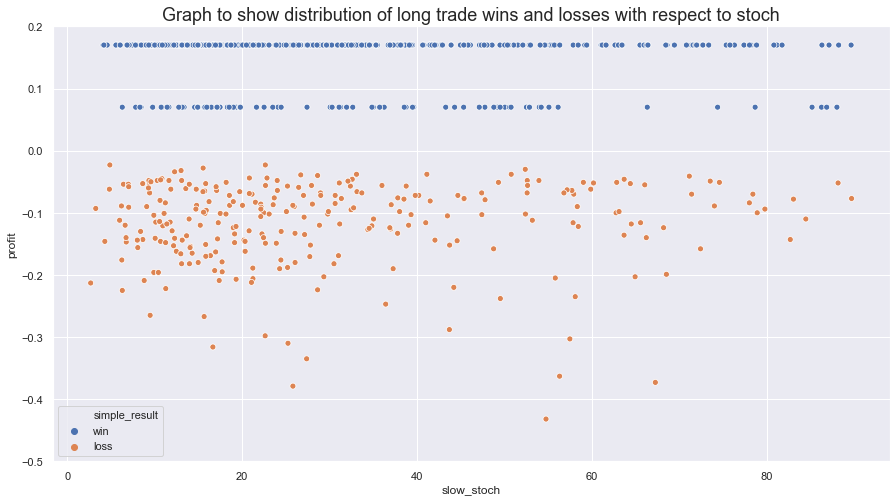

In [21]:
#Plot 3 - wins vs losses but for long trades only
plt.figure(figsize=(15,8))


sns.set(style="darkgrid")

sns.scatterplot(x="slow_stoch", y="profit", hue="simple_result", data=stochB)
plt.title("Graph to show distribution of long trade wins and losses with respect to stoch", fontsize=18)

plt.ylim([-0.5, 0.2])

plt.show()

In [22]:
stochB.simple_result.value_counts()

win     403
loss    272
Name: simple_result, dtype: int64

In [23]:
stochB.profit.sum()

27.920499999996956

Looking at the last two plots it does seem like the losses are skewed depending on the trade direction. However, because of how the wins were feature engineered it's not clear if the wins are skewed in either direction. If we choose a threshold on the stochastic x axis we could then count values in that region to determine win proportion. 

In [24]:
#test different stochastic thresholds to see if what proportion wins to losses we get. 

In [25]:
#For Longs
stochBx = stochB[stochB.slow_stoch > 40]
stochBx.simple_result.value_counts()

win     119
loss     72
Name: simple_result, dtype: int64

In [26]:
#For Shorts
stochAx = stochA[stochA.slow_stoch < 45]
stochAx.simple_result.value_counts()

win     62
loss    34
Name: simple_result, dtype: int64

In [27]:
stochA.simple_result.value_counts()

win     390
loss    258
Name: simple_result, dtype: int64

Ok so for simple wins and losses there doesn't seem to be a major difference or any skewed distribution to allow us to pick trades based on trade signal direction and the slow stochastic value. Now we should look into adding the running result to our visualisations to see if this can give us more useful insight??

### 4. Running result wins vs running losses

In [28]:
#Short Trades
running_wins_vs_simple_losses = forex[((forex.running_result=="win") | (forex.running_result=="loss") | 
                                       (forex.running_result=="no_runner")) & (forex.sent_signal=="short_trade")]

In [29]:
running_wins_vs_simple_losses.loc[50:55]

,time,open,high,low,close,fast_stoch,slow_stoch,rsi,30_sent,thirty_trend,4h_sent,four_trend,candle_dir,dt_signal,sent_signal,simple_result,running_result,profit
50,2019-01-16 15:00:00,140.245,140.328,140.092,140.101,74.252018,66.733171,57.965832,0.038500,bullish,0.122147,bullish,short,short,short_trade,win,win,0.170
51,2019-01-16 23:00:00,140.536,140.560,140.500,140.524,78.838233,78.656303,62.208682,0.039887,bullish,0.139565,bullish,short,short,short_trade,loss,no_runner,-0.056
52,2019-01-17 00:00:00,140.533,140.533,140.322,140.404,73.889585,77.374154,57.126915,0.031993,bullish,0.139565,bullish,short,short,short_trade,win,win,0.170
53,2019-01-17 02:30:00,140.372,140.386,140.230,140.362,42.959803,48.537231,55.029544,0.003772,bullish,0.139494,bullish,short,short,short_trade,win,win,0.170


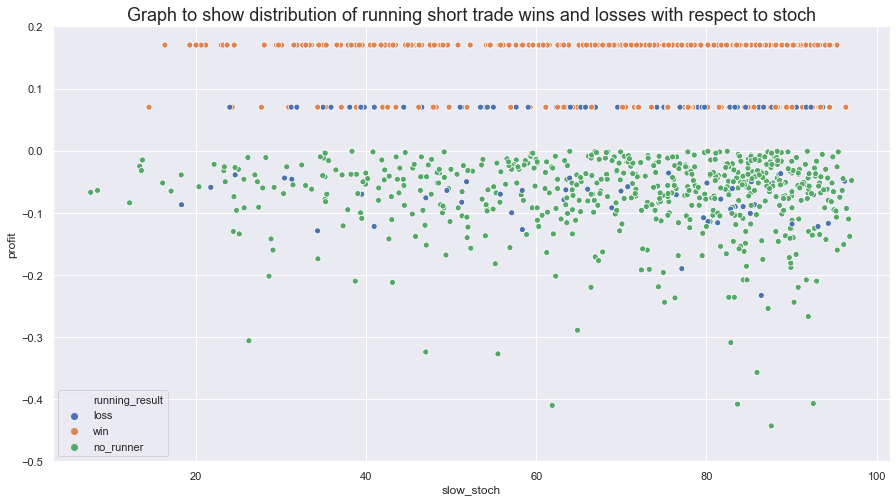

In [30]:
#Plot 4 - running wins vs simple losses for short trades
plt.figure(figsize=(15,8))


sns.set(style="darkgrid")

sns.scatterplot(x="slow_stoch", y="profit", hue="running_result", data=running_wins_vs_simple_losses)
plt.title("Graph to show distribution of running short trade wins and losses with respect to stoch", fontsize=18)

plt.ylim([-0.5, 0.2])

plt.show()

In [31]:
running_wins_vs_simple_losses.profit.sum()

16.221499999996688

In [32]:
#Long Trades
running_wins_simple_losses_long = forex[((forex.running_result=="win") | (forex.running_result=="loss") | 
                                       (forex.running_result=="no_runner")) & (forex.sent_signal=="long_trade")]

In [33]:
running_wins_simple_losses_long.loc[800:808]

,time,open,high,low,close,fast_stoch,slow_stoch,rsi,30_sent,thirty_trend,4h_sent,four_trend,candle_dir,dt_signal,sent_signal,simple_result,running_result,profit
800,2019-07-09 16:30:00,135.465,135.658,135.460,135.654,40.186688,32.539683,47.512274,-0.027849,bearish,0.014896,bearish,long,long,long_trade,sig_stop,no_runner,-0.049
803,2019-07-10 18:00:00,135.584,135.629,135.562,135.609,24.897119,28.627577,43.238701,-0.011255,bearish,0.012652,bearish,long,long,long_trade,sig_stop,no_runner,-0.009
805,2019-07-10 21:30:00,135.580,135.617,135.553,135.615,37.043281,32.009823,45.544324,-0.011089,bearish,0.000969,bearish,long,long,long_trade,sig_stop,no_runner,-0.049
806,2019-07-10 23:00:00,135.521,135.550,135.517,135.536,17.365789,26.701529,40.853117,-0.013392,bearish,0.000969,bearish,long,long,long_trade,loss,no_runner,-0.039
807,2019-07-11 02:30:00,135.145,135.238,135.135,135.183,10.133902,8.033893,27.000304,-0.037775,bearish,-0.006487,bearish,long,long,long_trade,running_long,win,0.070
808,2019-07-11 07:00:00,135.286,135.458,135.230,135.454,66.337229,55.481155,53.512065,-0.008992,bearish,-0.008372,bearish,long,long,long_trade,win,win,0.170


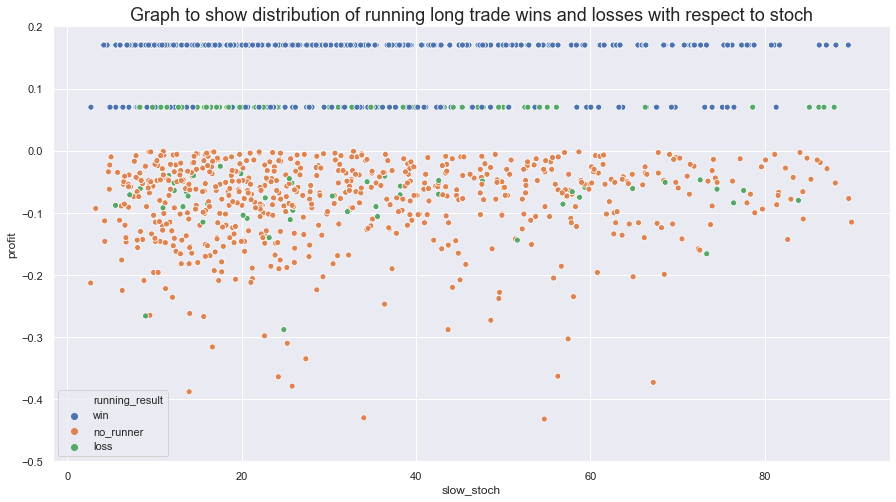

In [34]:
#Plot 5 - running wins vs simple losses for long trades
plt.figure(figsize=(15,8))


sns.set(style="darkgrid")

sns.scatterplot(x="slow_stoch", y="profit", hue="running_result", data=running_wins_simple_losses_long)
plt.title("Graph to show distribution of running long trade wins and losses with respect to stoch", fontsize=18)

plt.ylim([-0.5, 0.2])

plt.show()

In [35]:
running_wins_simple_losses_long.running_result.value_counts()

no_runner    632
win          442
loss         120
Name: running_result, dtype: int64

In [36]:
running_wins_simple_losses_long.profit.sum()

11.654499999996622

## Using total value of RSI and Stochs

In [37]:
forex["rsi_stoc_coef"] = forex.apply(lambda row : row.rsi + row.fast_stoch + row.slow_stoch, axis=1)

In [38]:
forex.head()

,time,open,high,low,close,fast_stoch,slow_stoch,rsi,30_sent,thirty_trend,4h_sent,four_trend,candle_dir,dt_signal,sent_signal,simple_result,running_result,profit,rsi_stoc_coef
0,2019-01-07 14:00:00,138.322,138.408,138.268,138.272,91.285107,86.681139,60.939545,-0.018425,bullish,0.134107,bullish,short,short,short_trade,win,loss,0.070,238.905790
1,2019-01-07 15:30:00,138.578,138.687,138.346,138.492,89.649879,90.104441,64.826891,0.002249,bullish,0.134107,bullish,short,short,short_trade,win,win,0.170,244.581211
2,2019-01-07 18:30:00,138.802,138.824,138.532,138.622,86.898499,91.325175,61.871256,0.022497,bullish,0.167150,bullish,short,short,short_trade,running_short,sig_stop,-0.059,240.094930
3,2019-01-07 20:30:00,138.829,138.874,138.762,138.816,88.437094,81.676800,66.758711,0.021740,bullish,0.167150,bullish,short,short,short_trade,running_short,loss,-0.078,236.872605
4,2019-01-07 23:00:00,138.926,138.966,138.878,138.887,90.241474,91.861208,67.107538,0.019568,bullish,0.183445,bullish,short,short,short_trade,sig_stop,no_runner,-0.001,249.210219


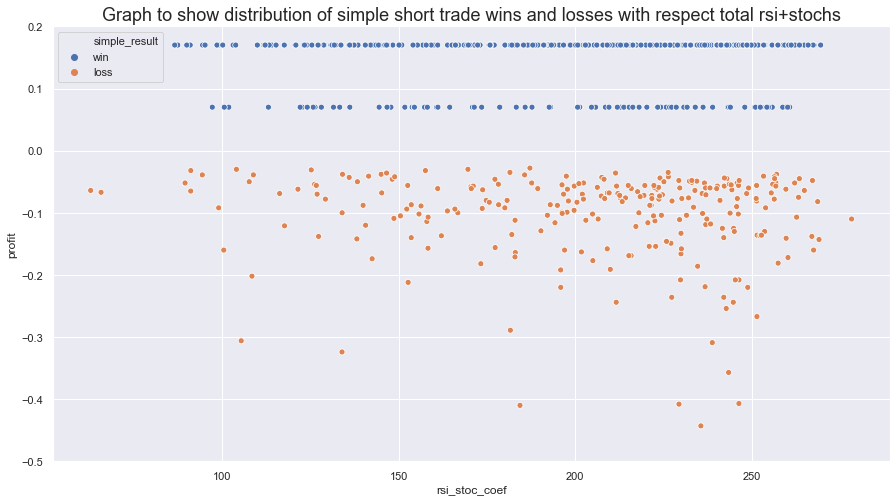

In [39]:
#Short Trades on simple result
mask = forex[((forex.simple_result=="win") | (forex.simple_result=="loss")) & (forex.sent_signal=="short_trade")]

#Plot 5 - wins vs losses for shorts with total rsi and stochs
plt.figure(figsize=(15,8))


sns.set(style="darkgrid")

sns.scatterplot(x="rsi_stoc_coef", y="profit", hue="simple_result", data=mask)
plt.title("Graph to show distribution of simple short trade wins and losses with respect total rsi+stochs",
          fontsize=18)

plt.ylim([-0.5, 0.2])

plt.show()

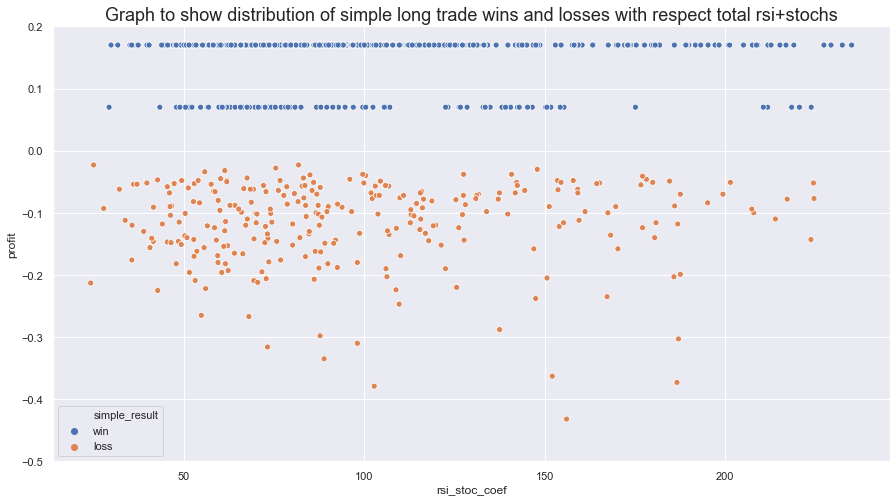

In [40]:
#Long Trades on Simple Result
mask = forex[((forex.simple_result=="win") | (forex.simple_result=="loss")) & (forex.sent_signal=="long_trade")]

#Plot 5 - wins vs losses for shorts with total rsi and stochs
plt.figure(figsize=(15,8))


sns.set(style="darkgrid")

sns.scatterplot(x="rsi_stoc_coef", y="profit", hue="simple_result", data=mask)
plt.title("Graph to show distribution of simple long trade wins and losses with respect total rsi+stochs",
          fontsize=18)

plt.ylim([-0.5, 0.2])

plt.show()

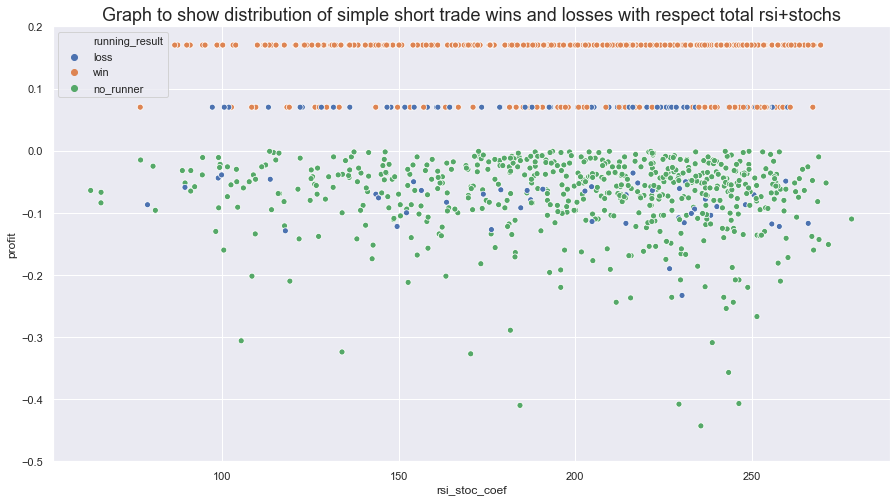

In [41]:
#Short Trades on running result with total rsi and stochs
mask = forex[((forex.running_result=="win") | (forex.running_result=="loss") | 
                                       (forex.running_result=="no_runner")) & (forex.sent_signal=="short_trade")]

#Plot 5 - wins vs losses for shorts with total rsi and stochs
plt.figure(figsize=(15,8))


sns.set(style="darkgrid")

sns.scatterplot(x="rsi_stoc_coef", y="profit", hue="running_result", data=mask)
plt.title("Graph to show distribution of simple short trade wins and losses with respect total rsi+stochs",
          fontsize=18)

plt.ylim([-0.5, 0.2])

plt.show()

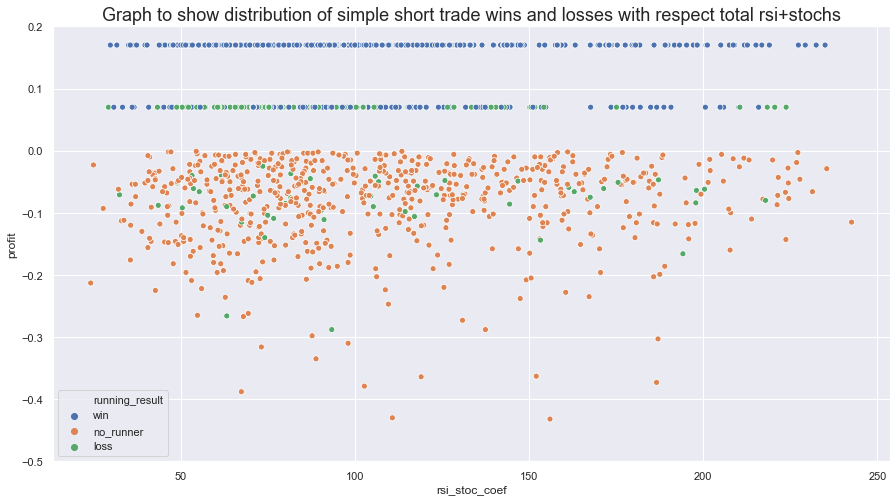

In [42]:
#Long Trades on running result with total rsi and stochs
mask = forex[((forex.running_result=="win") | (forex.running_result=="loss") | 
                                       (forex.running_result=="no_runner")) & (forex.sent_signal=="long_trade")]

#Plot 5 - wins vs losses for shorts with total rsi and stochs
plt.figure(figsize=(15,8))


sns.set(style="darkgrid")

sns.scatterplot(x="rsi_stoc_coef", y="profit", hue="running_result", data=mask)
plt.title("Graph to show distribution of simple short trade wins and losses with respect total rsi+stochs",
          fontsize=18)

plt.ylim([-0.5, 0.2])

plt.show()

## MK2 DATASET

In [43]:
!ls

Double_Tap_Feature_Engineering.ipynb gj_30base.csv
Forex_Data_Analysis.ipynb            gj_4base.csv
Forex_Models.ipynb                   gj_4hour_trend.csv
README.md                            gj_4hr.csv
dt_trend_clean.csv                   gj_cleandraft.csv
dt_trend_clean_mk2                   gj_thirty_trend.csv
features.txt                         gpbjpy_dataframe_gen.ipynb
forex.html                           superseded
gj30m_sentinc.csv                    trend_data_analysis.ipynb
gj4h_sentinc.csv                     trend_feature_eng.ipynb
gj_30_RSI_exp.csv


In [45]:
forex_2 = pd.read_csv('dt_trend_clean_mk2.csv')

In [46]:
forex_2.head()

,time,open,high,low,close,fast_stoch,slow_stoch,rsi,30_sent,thirty_trend,4h_sent,four_trend,candle_dir,dt_signal,sent_signal,simple_result,running_result,profit,ext_profit,no_sig_stop,running_nosig,tuned_profit
0,2019-01-07 14:00:00,138.322,138.408,138.268,138.272,91.285107,86.681139,60.939545,-0.018425,bullish,0.134107,bullish,short,short,short_trade,win,loss,0.070,0.070,win,loss,0.070
1,2019-01-07 15:30:00,138.578,138.687,138.346,138.492,89.649879,90.104441,64.826891,0.002249,bullish,0.134107,bullish,short,short,short_trade,win,win,0.170,0.227,win,win,0.154
2,2019-01-07 18:30:00,138.802,138.824,138.532,138.622,86.898499,91.325175,61.871256,0.022497,bullish,0.167150,bullish,short,short,short_trade,running_short,sig_stop,-0.059,-0.059,running_short,loss,-0.222
3,2019-01-07 20:30:00,138.829,138.874,138.762,138.816,88.437094,81.676800,66.758711,0.021740,bullish,0.167150,bullish,short,short,short_trade,running_short,loss,-0.078,-0.078,running_short,loss,-0.078
4,2019-01-07 23:00:00,138.926,138.966,138.878,138.887,90.241474,91.861208,67.107538,0.019568,bullish,0.183445,bullish,short,short,short_trade,sig_stop,no_runner,-0.001,-0.001,running_short,loss,-0.099


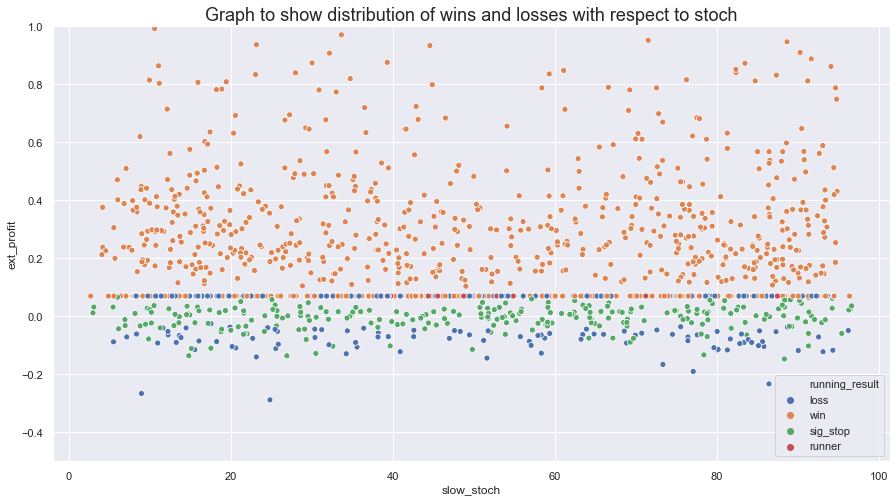

In [57]:
#Let's look at a scatter plot for all trades (unrestricted wins - ext_profit)
mask = forex_2[((forex_2.simple_result=="win") | (forex_2.simple_result=="loss") | (forex_2.simple_result=="sig_stop") |
               (forex_2.running_result=="win") | (forex_2.running_result=="loss") | 
               (forex_2.running_result=="sig_stop")) & (forex_2.running_result!="no_runner")]

#running wins vs losses vs sigstops with unrestricted wins
plt.figure(figsize=(15,8))


sns.set(style="darkgrid")

sns.scatterplot(x="slow_stoch", y="ext_profit", hue="running_result", data=mask)
plt.title("Graph to show distribution of wins and losses with respect to stoch", fontsize=18)

plt.ylim([-0.5, 1])

plt.show()
